Heart Disease Detection 

Data Source: Kaggle

Target Variable: TenYearCHD
    
Description: Depending upon the different Human Body condition whether a person get Chronic Heart Disease or not is found.

Exploring the Data

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Reading the dataset
heart_disease=pd.read_csv("HeartDiseaseData.csv", encoding='latin')

In [3]:
# Start observing the Quantitative/Categorical/Qualitative variables
heart_disease.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
heart_disease.nunique()

sex                   2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [6]:
# Looking at the statistial distribution of the data
heart_disease.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
#knowing the dimension of the dataset
heart_disease.shape

(4238, 16)

In [8]:
# Removing duplicate rows if any
print("Before Deleting Duplicates",heart_disease.shape)
heart_disease=heart_disease.drop_duplicates()
print("After Deleting Duplicates",heart_disease.shape)

Before Deleting Duplicates (4238, 16)
After Deleting Duplicates (4238, 16)


Observe the distribution of target variable

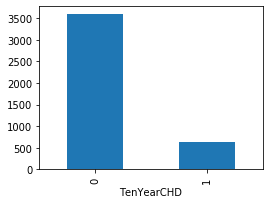

In [9]:
#distribution of target variable
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=heart_disease.groupby('TenYearCHD').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [10]:
#Getting all the Variables present in the dataset
heart_disease.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Grouping Continous and Categorical cols

In [11]:
Continous_Cols=['age','cigsPerDay','totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
Categorical_cols=['sex','education','currentSmoker','BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes']

Visualize distribution of all the Categorical Predictor variables in the data using Barcharts

Uni Variate Analaysis

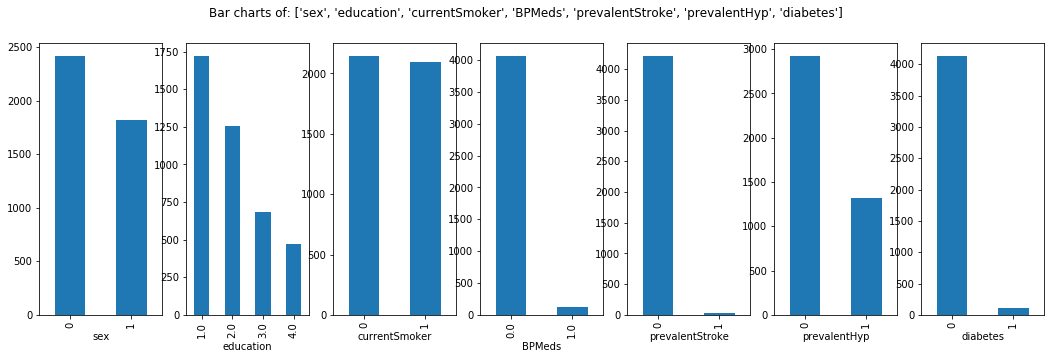

In [12]:
#creating a user defined function to Plot Multiple charts at once
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=heart_disease, colsToPlot=Categorical_cols)

Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7E0924F08>,
      dtype=object)

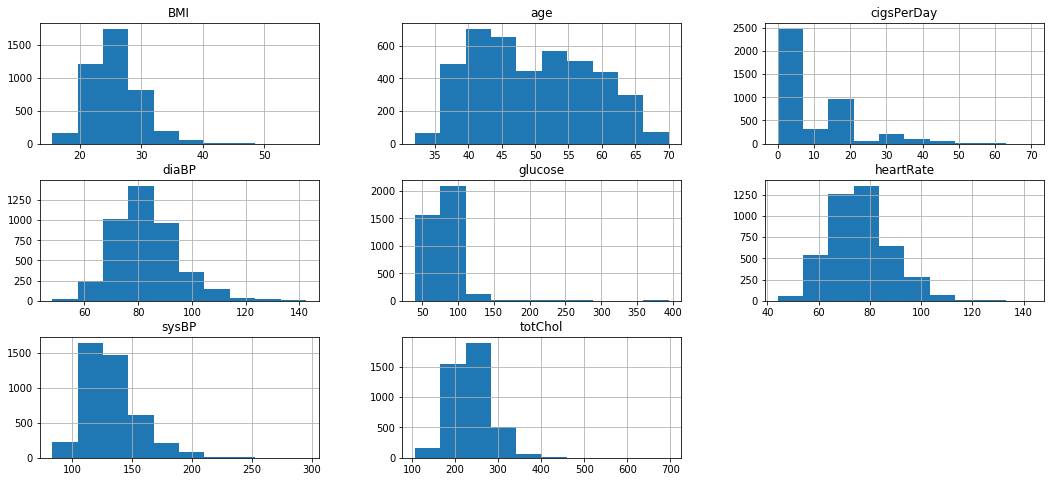

In [13]:
# Plotting histograms of multiple columns together
heart_disease.hist(Continous_Cols, figsize=(18,8))

Visual exploration of relationship between variables 

-Continuous Vs Continuous ---- Scatter Plot 
-Categorical Vs Continuous---- Bar Plot, Box Plot 
-Categorical Vs Categorical---- Bar Plot

Bi Variate Analysis

Categorical vs Continous

Bar Plots

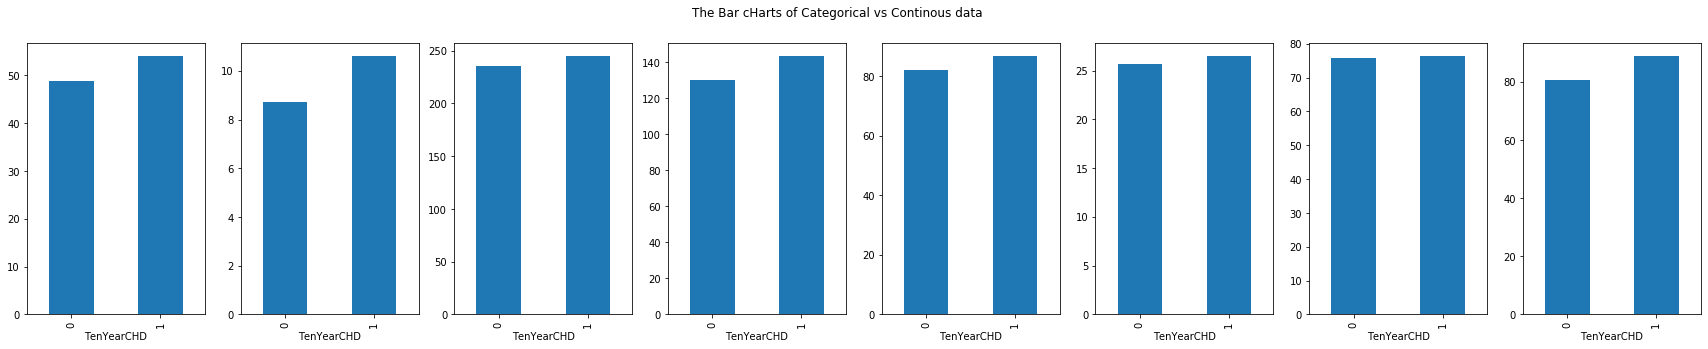

In [14]:
#creating a user defined function to Plot Multiple charts at once

def plotbarcharts(inpdata, colstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colstoplot), figsize=(30,5))
    fig.suptitle('The Bar cHarts of Categorical vs Continous data')
    
    for colname, plotnumber in zip(colstoplot, range(len(colstoplot))):
        inpdata.groupby('TenYearCHD').mean()[colname].plot(kind='bar', ax=subPlot[plotnumber])
        

plotbarcharts(inpdata=heart_disease, colstoplot=Continous_Cols)

Box Plots

C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
C:\Users\Goku\anaconda3\lib\site-pa

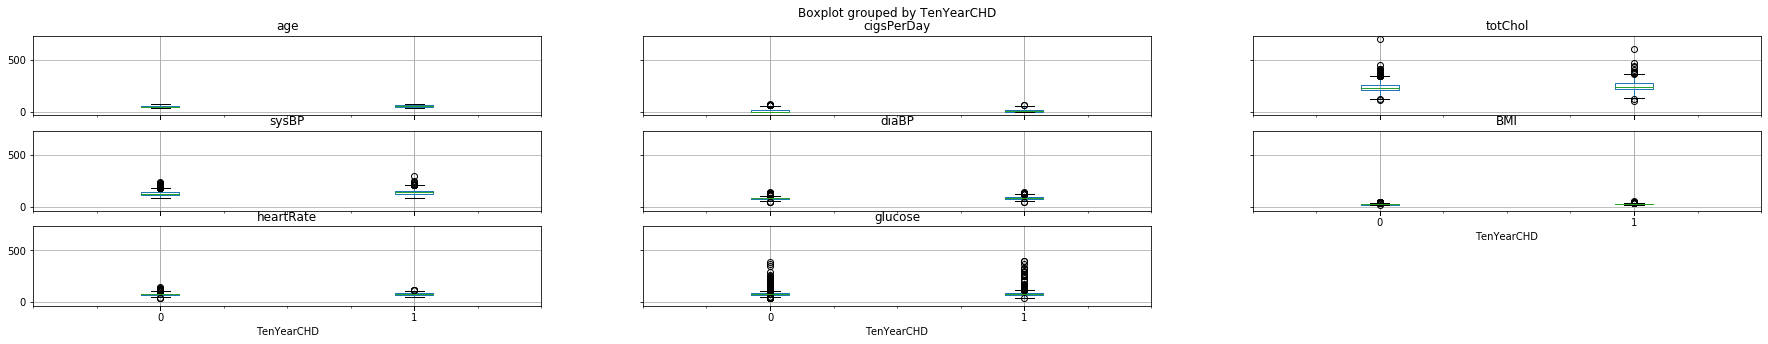

In [15]:
#creating a user defined function to Plot Multiple charts at once

def plotboxcharts(inpdata, colstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colstoplot), figsize=(30,5))
    fig.suptitle('The Bar cHarts of Categorical vs Continous data')
    
    for colname, plotnumber in zip(colstoplot, range(len(colstoplot))):
        inpdata.boxplot(column=colstoplot, by='TenYearCHD', figsize=(10,4), vert=True, ax=subPlot[plotnumber])
        
plotboxcharts(inpdata=heart_disease, colstoplot=Continous_Cols)


In [16]:
#search for the visible outliers
heart_disease.sort_values(by='totChol', ascending=False)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3160,1,51,NaN,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0
1111,0,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
194,0,42,3.0,0,0.0,0.0,0,0,0,464.0,128.0,87.0,22.90,72.0,72.0,1
3474,1,42,2.0,1,15.0,0.0,0,1,0,453.0,158.0,108.0,28.89,90.0,110.0,0
543,1,47,2.0,1,18.0,0.0,0,1,0,439.0,145.0,74.0,22.42,100.0,90.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,0,62,4.0,0,0.0,0.0,0,0,0,NaN,122.0,75.5,23.03,75.0,NaN,0
3960,0,50,1.0,0,0.0,0.0,0,0,0,NaN,120.0,75.5,24.77,65.0,NaN,0
3961,0,39,2.0,1,40.0,0.0,0,0,0,NaN,105.0,67.5,24.43,90.0,NaN,0
3988,0,51,3.0,1,43.0,0.0,0,0,0,NaN,122.0,76.0,25.73,80.0,NaN,0


In [17]:
#Outlier Treatment
heart_disease['totChol'][heart_disease['totChol']>600]=464

C:\Users\Goku\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


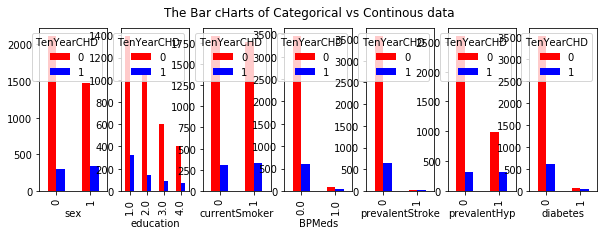

In [18]:
#creating a user defined function to Plot Multiple charts at once
def plotCrossBarcharts(inpdata, colstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colstoplot))
    fig.suptitle('The Bar cHarts of Categorical vs Continous data')
    
    for colname, plotnumber in zip(colstoplot, range(len(colstoplot))):
        CrossTabResult=pd.crosstab(index=heart_disease[colname], columns=heart_disease['TenYearCHD'])
        CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'],ax=subPlot[plotnumber])
        
plotCrossBarcharts(inpdata=heart_disease, colstoplot=Categorical_cols)

Statistical measurement of relationship between variables

-Continuous Vs Continuous ---- Correlation matrix
-Categorical Vs Continuous---- ANOVA test
-Categorical Vs Categorical--- Chi-Square test

#Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test.

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

-Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
-ANOVA Test result: Probability of H0 being true

In [19]:
#Creating user defined ANOVA function for feature selection process
def functionANova(inpdata, targetvar, Predictors):
    
    from scipy.stats import f_oneway
    Var=[]
    Notimp=[]
    for i in Predictors:
        CategoryGroupLists=inpdata.groupby(targetvar)[i].apply(list)
        AnovaResults=f_oneway(*CategoryGroupLists)
        np.set_printoptions(suppress=True)
        
        if(AnovaResults[1]<=0.05):
            Var.append(i)    
        else:
            Notimp.append(i)
            
    print("Selected Variables",Var)
    print("Not Selected Variables",Notimp)

In [20]:
#Calling the Function
functionANova(inpdata=heart_disease, targetvar=['TenYearCHD'], Predictors=Continous_Cols)

Selected Variables ['age', 'sysBP', 'diaBP']
Not Selected Variables ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']


Data Pre-processing for Machine Learning

In [21]:
#Treating Outliers
heart_disease.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Imputing the outlier values with a logical business value

In [22]:
#Continous Cols
heart_disease['cigsPerDay']=heart_disease['cigsPerDay'].interpolate(method='linear')
heart_disease['totChol']=heart_disease['totChol'].interpolate(method='linear')
heart_disease['BMI']=heart_disease['BMI'].interpolate(method='linear')
heart_disease['heartRate']=heart_disease['heartRate'].interpolate(method='linear')
heart_disease['glucose']=heart_disease['glucose'].interpolate(method='linear')

#Categorical Cols
heart_disease['BPMeds']=heart_disease['BPMeds'].interpolate(method='ffill')
heart_disease['education']=heart_disease['education'].interpolate(method='ffill')

In [23]:
#checking the variable after outlier treatment
heart_disease.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables
-Assumption(H0): The two columns are NOT related to each other
-Result of Chi-Sq Test: The Probability of H0 being True

In [24]:
def chisqtests(Inputdata, Targetvar, Preditors):
    
    for i in Preditors:
        from scipy.stats import chi2_contingency
        Crosstabresults=pd.crosstab(index=Inputdata[i], columns=Inputdata[Targetvar])
        ChiSqResult = chi2_contingency(Crosstabresults)
        print('The P-Value of the ChiSq Test of', i ,'is:', np.round( ChiSqResult[1],3))

In [25]:
chisqtests(Inputdata=heart_disease, Targetvar='TenYearCHD',Preditors=Categorical_cols)

The P-Value of the ChiSq Test of sex is: 0.0
The P-Value of the ChiSq Test of education is: 0.0
The P-Value of the ChiSq Test of currentSmoker is: 0.221
The P-Value of the ChiSq Test of BPMeds is: 0.0
The P-Value of the ChiSq Test of prevalentStroke is: 0.0
The P-Value of the ChiSq Test of prevalentHyp is: 0.0
The P-Value of the ChiSq Test of diabetes is: 0.0


In [26]:
#Currentsmoker variable is rejected

Converting Categorical data to numeric

-First Treat all Ordinal variables by manually mapping the numeric values
-Treat all nominal variables using dummy variables

In [27]:
# Treating all the nominal variables at once using dummy variables
heart_diseaseNumeric=pd.get_dummies(heart_disease)
heart_diseaseNumeric.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
# Saving the processed data as a pickle file
heart_diseaseNumeric.to_pickle('heart_diseaseNumeric.pkl')

In [29]:
# Printing all the column names for our reference
heart_diseaseNumeric.columns.values

array(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'], dtype=object)

Machine Learning: Splitting the data into Training and Testing sample

In [30]:
# Separate Target Variable and Predictor Variables
TargetVariable='TenYearCHD'
Predictors=['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
# Split the data into training and testing set
X=heart_diseaseNumeric[Predictors].values
y=heart_diseaseNumeric[TargetVariable].values

Logistic Regression

In [31]:
#Creating SuperLR user defined Function for Logistic Regression ML

def SuperLR(test_size,C):
    for x in test_size:
        for i in C:
            
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
            from sklearn.linear_model import LogisticRegression

            clf = LogisticRegression(C=i,penalty='l2', solver='newton-cg')
            # Creating the model on Training Data
            LOG=clf.fit(X_train,y_train)
            prediction=LOG.predict(X_test)
            # Measuring accuracy on Testing Data
            from sklearn import metrics
            print('test_size',x,'C',i)
            print(metrics.classification_report(y_test, prediction))
            print(metrics.confusion_matrix(y_test, prediction))
            # Printing the Overall Accuracy of the model
            F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
            print('Accuracy of the model:', F1_Score)

In [32]:
#Finding the best parameters by hyper-parameter tunnig to get better accuracy
SuperLR(test_size=[0.2,0.25,0.3] ,C=[1,2,3,4])

test_size 0.2 C 1
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

[[718   6]
 [115   9]]
Accuracy of the model: 0.81
test_size 0.2 C 2
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

[[718   6]
 [115   9]]
Accuracy of the model: 0.81
test_size 0.2 C 3
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy              

Decision Trees

In [33]:
#Creating SuperDT user defined Function for DT ML
def SuperDT(test_size,max_depth):
    for x in test_size:
        
        for i in max_depth:
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
            from sklearn import tree
            clf = tree.DecisionTreeClassifier(max_depth=i,criterion='entropy')
            # Creating the model on Training Data
            DTree=clf.fit(X_train,y_train)
            prediction=DTree.predict(X_test)
            # Measuring accuracy on Testing Data
            from sklearn import metrics
            print('Test_Size:',x,'Max_depth:',i)
            print(metrics.classification_report(y_test, prediction))
            print(metrics.confusion_matrix(y_test, prediction))
            # Printing the Overall Accuracy of the model
            F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
            print('Accuracy of the model:', F1_Score)
            # Plotting the feature importance for Top 10 most important columns
            %matplotlib inline
            feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
            feature_importances.nlargest(10).plot(kind='barh')

Test_Size: 0.2 Max_depth: 2
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79
Test_Size: 0.2 Max_depth: 3
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79
Test_Size: 0.2 Max_depth: 5
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       724
           1       0.38      0.11      0.17       1

C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_depth: 7
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       724
           1       0.27      0.11      0.16       124

    accuracy                           0.83       848
   macro avg       0.57      0.53      0.53       848
weighted avg       0.78      0.83      0.79       848

[[687  37]
 [110  14]]
Accuracy of the model: 0.79
Test_Size: 0.25 Max_depth: 2
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79
Test_Size: 0.25 Max_depth: 3
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00      

C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       908
           1       0.57      0.14      0.22       152

    accuracy                           0.86      1060
   macro avg       0.72      0.56      0.57      1060
weighted avg       0.83      0.86      0.82      1060

[[892  16]
 [131  21]]
Accuracy of the model: 0.82
Test_Size: 0.25 Max_depth: 7
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       908
           1       0.35      0.16      0.22       152

    accuracy                           0.84      1060
   macro avg       0.61      0.56      0.57      1060
weighted avg       0.80      0.84      0.81      1060

[[861  47]
 [127  25]]
Accuracy of the model: 0.81
Test_Size: 0.3 Max_depth: 2


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78
Test_Size: 0.3 Max_depth: 3
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1082    2]
 [ 188    0]]
Accuracy of the model: 0.78
Test_Size: 0.3 Max_depth: 5
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1084
           1       0.45      0.14      0.21       188

    accuracy    

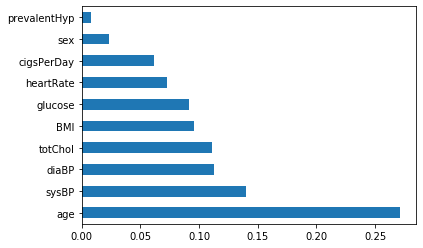

In [34]:
#Finding the best parameters by hyper-parameter tunnig to get better accuracy
SuperDT(test_size=[0.2,0.25,0.3] ,max_depth=[2,3,5,7])

Random Forest (Bagging of multiple Decision Trees)

In [35]:
#Creating SuperRF user defined Function for RF ML
def SuperRF(test_size,max_depth, n_estimators):
    for x in test_size:
        for depth in max_depth:
            for estimator in n_estimators:
                from sklearn.model_selection import train_test_split
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
                from sklearn.ensemble import RandomForestClassifier
                clf = RandomForestClassifier(max_depth=depth, n_estimators=estimator,criterion='entropy')
                # Creating the model on Training Data
                RF=clf.fit(X_train,y_train)
                prediction=RF.predict(X_test)
                # Measuring accuracy on Testing Data
                from sklearn import metrics
                print('Test_Size:',x,'Max_Depth:',depth,'N_Estimators',estimator)
                print(metrics.classification_report(y_test, prediction))
                print(metrics.confusion_matrix(y_test, prediction))
                # Printing the Overall Accuracy of the model
                F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
                print('Accuracy of the model:', F1_Score)
                # Plotting the feature importance for Top 10 most important columns
                %matplotlib inline
                feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
                feature_importances.nlargest(10).plot(kind='barh')

Test_Size: 0.2 Max_Depth: 2 N_Estimators 100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_Depth: 2 N_Estimators 200
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_Depth: 2 N_Estimators 300
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_Depth: 3 N_Estimators 100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_Depth: 3 N_Estimators 200
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_Depth: 3 N_Estimators 300
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_Depth: 5 N_Estimators 100
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       1.00      0.02      0.03       124

    accuracy                           0.86       848
   macro avg       0.93      0.51      0.48       848
weighted avg       0.88      0.86      0.79       848

[[724   0]
 [122   2]]
Accuracy of the model: 0.79
Test_Size: 0.2 Max_Depth: 5 N_Estimators 200
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       1.00      0.02      0.03       124

    accuracy                           0.86       848
   macro avg       0.93      0.51      0.48       848
weighted avg       0.88      0.86      0.79       848

[[724   0]
 [122   2]]
Accuracy of the model: 0.79
Test_Size: 0.2 Max_Depth: 5 N_Estimators 300
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.25 Max_Depth: 2 N_Estimators 200
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.25 Max_Depth: 2 N_Estimators 300
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.25 Max_Depth: 3 N_Estimators 100
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.25 Max_Depth: 3 N_Estimators 200
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.25 Max_Depth: 3 N_Estimators 300
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.25 Max_Depth: 5 N_Estimators 100
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.67      0.01      0.03       152

    accuracy                           0.86      1060
   macro avg       0.76      0.51      0.47      1060
weighted avg       0.83      0.86      0.79      1060

[[907   1]
 [150   2]]
Accuracy of the model: 0.79
Test_Size: 0.25 Max_Depth: 5 N_Estimators 200
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.67      0.01      0.03       152

    accuracy                           0.86      1060
   macro avg       0.76      0.51      0.47      1060
weighted avg       0.83      0.86      0.79      1060

[[907   1]
 [150   2]]
Accuracy of the model: 0.79
Test_Size: 0.25 Max_Depth: 5 N_Estimators 300
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       9

C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.3 Max_Depth: 2 N_Estimators 200
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.3 Max_Depth: 2 N_Estimators 300
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.3 Max_Depth: 3 N_Estimators 100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.3 Max_Depth: 3 N_Estimators 200
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       1.00      0.01      0.01       188

    accuracy                           0.85      1272
   macro avg       0.93      0.50      0.47      1272
weighted avg       0.87      0.85      0.79      1272

[[1084    0]
 [ 187    1]]
Accuracy of the model: 0.79
Test_Size: 0.3 Max_Depth: 3 N_Estimators 300
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.3 Max_Depth: 5 N_Estimators 100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.50      0.01      0.01       188

    accuracy                           0.85      1272
   macro avg       0.68      0.50      0.47      1272
weighted avg       0.80      0.85      0.79      1272

[[1083    1]
 [ 187    1]]
Accuracy of the model: 0.79
Test_Size: 0.3 Max_Depth: 5 N_Estimators 200
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.50      0.01      0.01       188

    accuracy                           0.85      1272
   macro avg       0.68      0.50      0.47      1272
weighted avg       0.80      0.85      0.79      1272

[[1083    1]
 [ 187    1]]
Accuracy of the model: 0.79
Test_Size: 0.3 Max_Depth: 5 N_Estimators 300
              precision    recall  f1-score   support

           0       0.85      1.00      0.92   

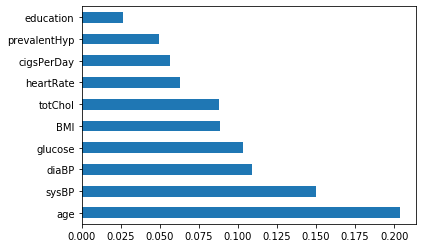

In [36]:
SuperRF(test_size=[0.2,0.25,0.3],max_depth=[2,3,5,7], n_estimators=[100,200,300])

Ada Boost

In [37]:
#Creating SuperLR user defined Function for AB ML
def SuperAB(test_size,max_depth, n_estimators):
    for x in test_size:
        for depth in max_depth:
            for estimator in n_estimators:
                from sklearn.model_selection import train_test_split
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
                from sklearn.ensemble import AdaBoostClassifier
                from sklearn.tree import DecisionTreeClassifier 
                DTC=DecisionTreeClassifier(max_depth=1)
                clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.06)
                # Creating the model on Training Data
                AB=clf.fit(X_train,y_train)
                prediction=AB.predict(X_test)
                # Measuring accuracy on Testing Data
                from sklearn import metrics
                print(metrics.classification_report(y_test, prediction))
                print(metrics.confusion_matrix(y_test, prediction))
                print('Test_Size:',x,'Max_Depth:',depth,'N_Estimators',estimator)
                # Printing the Overall Accuracy of the model
                F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
                print('Accuracy of the model:', F1_Score)
                # Plotting the feature importance for Top 10 most important columns
                %matplotlib inline
                feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
                feature_importances.nlargest(10).plot(kind='barh')

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       0.50      0.02      0.03       124

    accuracy                           0.85       848
   macro avg       0.68      0.51      0.48       848
weighted avg       0.80      0.85      0.79       848

[[722   2]
 [122   2]]
Test_Size: 0.2 Max_Depth: 2 N_Estimators 100
Accuracy of the model: 0.79
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       0.50      0.02      0.03       124

    accuracy                           0.85       848
   macro avg       0.68      0.51      0.48       848
weighted avg       0.80      0.85      0.79       848

[[722   2]
 [122   2]]
Test_Size: 0.2 Max_Depth: 2 N_Estimators 200
Accuracy of the model: 0.79
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       0.50      0.02      0.03  

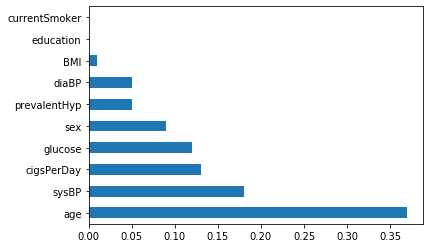

In [38]:
SuperAB(test_size=[0.2,0.25,0.3],max_depth=[2,3,5,7], n_estimators=[100,200,300])

XG Boost

In [39]:
#Creating SuperLR user defined Function for XG ML
def SuperXG(test_size,max_depth, n_estimators, learning_rate):
    for x in test_size:
        for depth in max_depth:
            for estimator in n_estimators:
                for n in learning_rate:
                    
                    from sklearn.model_selection import train_test_split
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
                    from xgboost import XGBClassifier
                    # Creating the model on Training Data
                    clf=XGBClassifier(max_depth=depth, learning_rate=n, n_estimators=estimator, objective='binary:logistic', booster='gbtree')
                    # Creating the model on Training Data
                    XGB=clf.fit(X_train,y_train)
                    prediction=XGB.predict(X_test)
                    # Measuring accuracy on Testing Data
                    from sklearn import metrics
                    print('Test_Size:',x,'Max_Depth:',depth,'N_Estimators',estimator)
                    print(metrics.classification_report(y_test, prediction))
                    print(metrics.confusion_matrix(y_test, prediction))
                    # Printing the Overall Accuracy of the model
                    F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
                    print('Accuracy of the model:', F1_Score)
                    # Plotting the feature importance for Top 10 most important columns 
                    %matplotlib inline
                    feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
                    feature_importances.nlargest(10).plot(kind='barh')

Test_Size: 0.2 Max_Depth: 2 N_Estimators 100
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.46      0.05      0.09       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.50       848
weighted avg       0.80      0.85      0.80       848

[[717   7]
 [118   6]]
Accuracy of the model: 0.80
Test_Size: 0.2 Max_Depth: 2 N_Estimators 100
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_Size: 0.2 Max_Depth: 2 N_Estimators 200
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       724
           1       0.45      0.07      0.12       124

    accuracy                           0.85       848
   macro avg       0.66      0.53      0.52       848
weighted avg       0.80      0.85      0.80       848

[[713  11]
 [115   9]]
Accuracy of the model: 0.80
Test_Size: 0.2 Max_Depth: 2 N_Estimators 200
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79
Test_Size: 0.2 Max_Depth: 2 N_Estimators 300
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       724


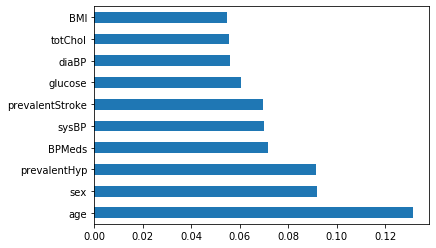

In [40]:
SuperXG(test_size=[0.2,0.25,0.3],max_depth=[2,3,5,7], n_estimators=[100,200,300], learning_rate=[0.1,0.01])

K-Nearest Neighbor(KNN)

In [41]:
#Creating SuperLR user defined Function for KNN ML
def SuperKNN(test_size,n_neighbors):
    for x in test_size:
        for i in n_neighbors:
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
            from sklearn.neighbors import KNeighborsClassifier
            clf = KNeighborsClassifier(n_neighbors=i)
            # Creating the model on Training Data
            KNN=clf.fit(X_train,y_train)
            prediction=KNN.predict(X_test)
            # Measuring accuracy on Testing Data
            from sklearn import metrics
            print('Test_Size:',x,'N_neighbors:', i)
            print(metrics.classification_report(y_test, prediction))
            print(metrics.confusion_matrix(y_test, prediction))
            # Printing the Overall Accuracy of the model
            F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
            print('Accuracy of the model:', F1_Score)

            # There is no built-in method to get feature importance in KNN

In [42]:
SuperKNN(test_size=[0.2,0.25,0.3], n_neighbors=[2,3,5,7])

Test_Size: 0.2 N_neighbors: 2
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       724
           1       0.28      0.07      0.12       124

    accuracy                           0.84       848
   macro avg       0.57      0.52      0.51       848
weighted avg       0.77      0.84      0.79       848

[[701  23]
 [115   9]]
Accuracy of the model: 0.79
Test_Size: 0.2 N_neighbors: 3
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       724
           1       0.26      0.14      0.18       124

    accuracy                           0.82       848
   macro avg       0.56      0.54      0.54       848
weighted avg       0.78      0.82      0.79       848

[[676  48]
 [107  17]]
Accuracy of the model: 0.79
Test_Size: 0.2 N_neighbors: 5
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       724
           1       0.26      0.08      0.12  

Support Vector Machines(SVM)

In [43]:
#Creating SuperLR user defined Function for SVM ML
def SuperSVM(test_size, C, gamma):
    for x in test_size:
        for i in C:
            for z in gamma:
                from sklearn.model_selection import train_test_split
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
                from sklearn import svm
                clf = svm.SVC(C=i, kernel='rbf', gamma=z)
                # Creating the model on Training Data
                SVM=clf.fit(X_train,y_train)
                prediction=SVM.predict(X_test)
                # Measuring accuracy on Testing Data
                from sklearn import metrics
                print('Test_size:',x,'C:', i,'gamma:', z)
                print(metrics.classification_report(y_test, prediction))
                print(metrics.confusion_matrix(y_test, prediction))
                # Printing the Overall Accuracy of the model
                F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
                print('Accuracy of the model:', F1_Score)
               

In [44]:
SuperSVM(test_size=[0.2,0.25,0.3],C=[5,10,15,20],gamma=[0.1,0.01])

Test_size: 0.2 C: 5 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.2 C: 5 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.25      0.02      0.04       124

    accuracy                           0.85       848
   macro avg       0.55      0.51      0.48       848
weighted avg       0.77      0.85      0.79       848

[[715   9]
 [121   3]]
Accuracy of the model: 0.79
Test_size: 0.2 C: 10 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.2 C: 10 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.23      0.02      0.04       124

    accuracy                           0.85       848
   macro avg       0.54      0.51      0.48       848
weighted avg       0.76      0.85      0.79       848

[[714  10]
 [121   3]]
Accuracy of the model: 0.79
Test_size: 0.2 C: 15 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.2 C: 15 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.23      0.02      0.04       124

    accuracy                           0.85       848
   macro avg       0.54      0.51      0.48       848
weighted avg       0.76      0.85      0.79       848

[[714  10]
 [121   3]]
Accuracy of the model: 0.79
Test_size: 0.2 C: 20 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848

[[724   0]
 [124   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.2 C: 20 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.23      0.02      0.04       124

    accuracy                           0.85       848
   macro avg       0.54      0.51      0.48       848
weighted avg       0.76      0.85      0.79       848

[[714  10]
 [121   3]]
Accuracy of the model: 0.79
Test_size: 0.25 C: 5 gamma: 0.1
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.25 C: 5 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       908
           1       0.16      0.02      0.04       152

    accuracy                           0.84      1060
   macro avg       0.51      0.50      0.48      1060
weighted avg       0.76      0.84      0.79      1060

[[892  16]
 [149   3]]
Accuracy of the model: 0.79
Test_size: 0.25 C: 10 gamma: 0.1
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.25 C: 10 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       908
           1       0.15      0.02      0.03       152

    accuracy                           0.84      1060
   macro avg       0.50      0.50      0.47      1060
weighted avg       0.76      0.84      0.79      1060

[[891  17]
 [149   3]]
Accuracy of the model: 0.79
Test_size: 0.25 C: 15 gamma: 0.1
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.25 C: 15 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       908
           1       0.15      0.02      0.03       152

    accuracy                           0.84      1060
   macro avg       0.50      0.50      0.47      1060
weighted avg       0.76      0.84      0.79      1060

[[891  17]
 [149   3]]
Accuracy of the model: 0.79
Test_size: 0.25 C: 20 gamma: 0.1
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060

[[908   0]
 [152   0]]
Accuracy of the model: 0.79


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.25 C: 20 gamma: 0.01
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       908
           1       0.15      0.02      0.03       152

    accuracy                           0.84      1060
   macro avg       0.50      0.50      0.47      1060
weighted avg       0.76      0.84      0.79      1060

[[891  17]
 [149   3]]
Accuracy of the model: 0.79
Test_size: 0.3 C: 5 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.3 C: 5 gamma: 0.01
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1084
           1       0.20      0.03      0.06       188

    accuracy                           0.84      1272
   macro avg       0.53      0.50      0.48      1272
weighted avg       0.76      0.84      0.78      1272

[[1060   24]
 [ 182    6]]
Accuracy of the model: 0.78
Test_size: 0.3 C: 10 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.3 C: 10 gamma: 0.01
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1084
           1       0.19      0.03      0.05       188

    accuracy                           0.84      1272
   macro avg       0.52      0.50      0.48      1272
weighted avg       0.76      0.84      0.78      1272

[[1059   25]
 [ 182    6]]
Accuracy of the model: 0.78
Test_size: 0.3 C: 15 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.3 C: 15 gamma: 0.01
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1084
           1       0.19      0.03      0.05       188

    accuracy                           0.84      1272
   macro avg       0.52      0.50      0.48      1272
weighted avg       0.76      0.84      0.78      1272

[[1059   25]
 [ 182    6]]
Accuracy of the model: 0.78
Test_size: 0.3 C: 20 gamma: 0.1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272

[[1084    0]
 [ 188    0]]
Accuracy of the model: 0.78


C:\Users\Goku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test_size: 0.3 C: 20 gamma: 0.01
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1084
           1       0.19      0.03      0.05       188

    accuracy                           0.84      1272
   macro avg       0.52      0.50      0.48      1272
weighted avg       0.76      0.84      0.78      1272

[[1059   25]
 [ 182    6]]
Accuracy of the model: 0.78


Navie BAyes

In [45]:
def SuperNB(test_size):
    
    for x in test_size:
        
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=42)
        from sklearn.naive_bayes import GaussianNB
        # GaussianNB is used in Binomial Classification
        # MultinomialNB is used in multi-class classification
        clf=GaussianNB()
        print(clf)

        NB=clf.fit(X_train, y_train)
        prediction=NB.predict(X_test)
        # Measuring accuracy on Testing Data
        from sklearn import metrics 
        print(metrics.classification_report(y_test, prediction))
        print(metrics.confusion_matrix(y_test, prediction))
        # Printing the Overall Accuracy of the model
        F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
        print("accuracy",F1_Score)


In [46]:
SuperNB(test_size=[0.2,0.25,0.3])

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       724
           1       0.33      0.20      0.25       124

    accuracy                           0.82       848
   macro avg       0.60      0.57      0.57       848
weighted avg       0.79      0.82      0.80       848

[[673  51]
 [ 99  25]]
accuracy 0.80
GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       908
           1       0.34      0.22      0.27       152

    accuracy                           0.83      1060
   macro avg       0.61      0.57      0.58      1060
weighted avg       0.80      0.83      0.81      1060

[[845  63]
 [119  33]]
accuracy 0.81
GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1084
           1       0.37     

LR:
    Accuracy of the model: 82%
    Parameters:testsize =0.25 C=1
DT:
    Accuracy of the model: 82%
    Parameters:testsize = 0.25 max_depth=5
RF:
    Accuracy of the model: 80%
    Parameters:testsize =  0.25 max_depth=7 Estimator=100
AdaBoost: 
    Accuracy of the model: 79%
    Parameters:testsize =0.2   max_depth=2  Estimator=100
XgBoost:
     Accuracy of the model: 82%
     Parameters:testsize = 0.25   max_depth=5  Estimator=100
KNN:
     Accuracy of the model: 80%
     Parameters:testsize = 0.25   N_Neighbor=7
SVM:
    Accuracy of the model: 79%
    Parameters:testsize = 0.2   C=5  gamma=0.1
NB:
    Accuracy of the model: 81%
     Parameters:testsize = 0.25  

Best Model is DT, XG and LR

Trying out Clustering in this datasets to gain more insights of the data:
    
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

In [47]:
#Reading the saved pickle file 
heart_diseaseNumeric_ML=pd.read_pickle('heart_diseaseNumeric.pkl')
heart_diseaseNumeric_ML

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,96.5,0


In [48]:
TargetVariable='TenYearCHD'
Predictors=['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
X=heart_diseaseNumeric_ML[Predictors].values
Y=heart_diseaseNumeric_ML[TargetVariable].values

Finding the best number of clusters based on the inertia value

K-Means

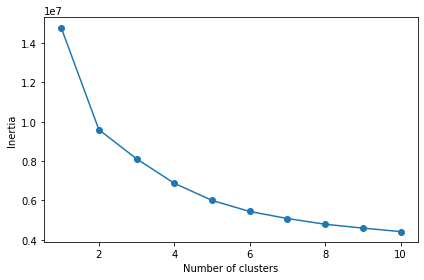

In [49]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 11), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

Using above graph deciding optimal number of clusters

In [50]:
# Defining the K-Means object for best number of clusters. n=6 in this case
km = KMeans(n_clusters=6, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

In [51]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[0 5 5 ... 5 5 1]
Inertia: 5437834.489987694


In [52]:
heart_diseaseNumeric_ML['PredictedClusterID']=predictedCluster
heart_diseaseNumeric_ML.head(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PredictedClusterID
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,5
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,5
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,2
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1,0
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0,4
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0,1
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0,2


Visualizing the clusters using any two columns in data

No handles with labels found to put in legend.


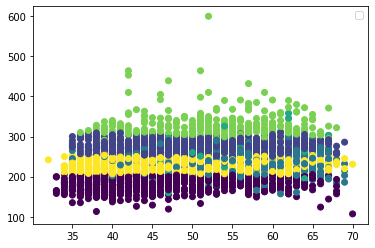

In [53]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=heart_diseaseNumeric_ML['age'], y=heart_diseaseNumeric_ML['totChol'], c=heart_diseaseNumeric_ML['PredictedClusterID'])
plt.legend()

Heirarchical Clustering

      sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   
...   ...  ...        ...            ...         ...     ...              ...   
4233    1   50        1.0              1         1.0     0.0                0   
4234    1   51        3.0              1        43.0     0.0                0   
4235    0   48        2.0              1        20.0     0.0                0   
4236    0   44        1.0              1        15.0     0.0                0   
4237    0   52        2.0              0         0.0     0.0                0   

      prevalentHyp  diabete

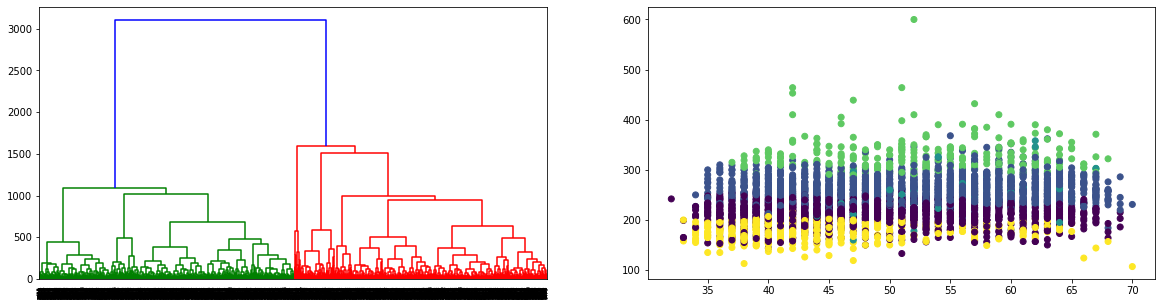

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, subPlots=plt.subplots(nrows=1, ncols=2,figsize=(20,5))

#creating Dendogram to find clusters
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X, method='ward'), ax=subPlots[0])

#creating 5 clusters based on Dendogram
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')

#generating cluster id for each row using agglomerative algorithm
heart_diseaseNumeric_ML['D_PredictedClusterID']=hc.fit_predict(X)
print(heart_diseaseNumeric_ML)

#plottingPredicted clusters
plt.scatter(x=heart_diseaseNumeric_ML['age'], y=heart_diseaseNumeric_ML['totChol'], 
                                                                    c=heart_diseaseNumeric_ML['D_PredictedClusterID'])

Finding Best number of clusters for Hierarchical Clustering using Silhouette Coefficient

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
The best value of Silhouette Coefficient is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster

In [55]:
## Finding Optimal Number of clusters using silhouette score

from sklearn.metrics import silhouette_score

#defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=10, step=1)

#creating empty dataset
silhouette_score_data=pd.DataFrame()

for n_clusters_trail in n_clusters_list:
    from sklearn.cluster import AgglomerativeClustering
    hc= AgglomerativeClustering( n_clusters= n_clusters_trail,affinity='euclidean', linkage='ward')
    
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score=silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    silhouette_score_data=silhouette_score_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trail]],
                                                                   columns=['score','Clusters']))

In [56]:
silhouette_score_data

,score,Clusters
0,0.285721,2
0,0.295405,3
0,0.242416,4
0,0.139856,5
0,0.144111,6
0,0.149841,7
0,0.126457,8
0,0.111841,9


In [57]:
silhouette_score_data.sort_values(by='score',ascending=False).head(1)

,score,Clusters
0,0.295405,3


The Optimal number of clusters in this dataset was found by both Inertia value and Dendogram.